In [218]:
import glob
import os
import time
import pandas as pd
import datetime as dt
import pathlib
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from pathlib import Path
import qgrid
import numpy as np

In [30]:
dir_name = '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science'


In [31]:
# get list of all filies only in the given diretory
list_of_files = filter(os.path.isfile, glob.glob(dir_name + '/**/*'))

In [32]:
# sort list of files based on last modification time
list_of_files = sorted(list_of_files, key=os.path.getmtime)

In [33]:
# iterate over sorted list of files and print file path
# along with last modidicaiton date time
for file_path in list_of_files:
    time_stamp_str = time.strftime('%m/%d/%Y :: %H:%M:%S',
                                  time.gmtime(os.path.getmtime(file_path)))
    print(time_stamp_str, ' -->', file_path)

11/18/2020 :: 01:55:44  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/widgets.py
11/18/2020 :: 23:28:45  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/widgets_interactive.py
11/19/2020 :: 00:13:59  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/labels.py
11/22/2020 :: 20:16:56  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/exercise_8.py
11/22/2020 :: 20:39:04  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/labels_radio_buttons.py
11/27/2020 :: 23:57:27  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/filtering_glyphs.py
12/05/2020 :: 19:49:52  --> /Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh/bitcoin_streaming_webscrapping.py
12/05/2020 :: 20:26:15  --> /Users/brendan/Library/Mobile D

In [34]:
time_stamp_str

'07/17/2021 :: 19:49:51'

## try 2

In [35]:
dir_name

'/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science'

In [36]:
filelist = []

In [37]:
for root, dirs, files in os.walk(dir_name):
    for file in files:
        # append the file name to the list
        filelist.append(os.path.join(root,file))
    
# print all the file names
#for name in filelist:
    #print(name)

In [38]:
#type(name)

In [39]:
type(filelist)

list

In [40]:
df = pd.DataFrame(filelist, columns=['FileName'])
df.to_csv('files.csv',index=False)

# sept 4

In [41]:
fname = pathlib.Path(dir_name)

In [42]:
assert fname.exists(), f'No such file: {fname}'

In [43]:
print(fname.stat())

os.stat_result(st_mode=16877, st_ino=287493, st_dev=16777230, st_nlink=12, st_uid=501, st_gid=20, st_size=384, st_atime=1630768229, st_mtime=1630545088, st_ctime=1630545089)


In [44]:
mtime = datetime.datetime.fromtimestamp(fname.stat().st_mtime)
print(mtime)

2021-09-01 21:11:28


In [45]:

root = dir_name
for item in os.listdir(root):
    if not item.startswith('.') and os.path.isfile(os.path.join(root, item)):
        print(item)

In [46]:
filesglob = glob.glob('/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/[!.DS_Store]*')
filesglob

['/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Bokeh',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Udemy',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Tableau',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Python',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/insty',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/13F',
 '/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science/Udemy-BT']

In [47]:
p = Path('/Users/brendan/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Data Science'
).glob('')
p

<generator object Path.glob at 0x7f7f2286a970>

In [48]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
       
                
    return allFiles

dirName = dir_name;
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
#listOfFiles

In [49]:
d_ext_desc = {'csv':'CSV file',
              'css' : 'CSS Styling',
              'db':'Thumbnail',
              'doc':'Microsoft Word Document',
              'docx':'Microsoft Word Document',
              'GIF':'GIF Image file',
              'html':'HTML file',
              'ico':'Icon Image file',
              'ipynb': 'Jupyter Notebook',
              '.ipynb':'Jupyter',
              'ipynb.icloud': 'Jupyter',
              'html': 'HTML',
              'jpg':'JPG Image file',
              'JPEG':'JPEG Image file',
              'js': 'Javascript',
              'json':'JSON file',
              'lnk':'Shortcut file',
              'msg':'Microsoft Outlook Message file',
              'pdf':'PDF file',
              'pkl':'Pickle (python) file',
              'png':'PNG Image file',
              'ppt':'Microsoft Powerpoint file',
              'pptx':'Microsoft Powerpoint file',
              'pst':'Microsoft Outlook Data file',
              'py':'Python file',
              'pyc':'Python file (compiled)',
              'rtf':'Rich Text Format',
              'svg':'SVG Image file',
              'txt':'Text document',
              'url':'Hyperlink',
              'vsd':'Microsoft Visio file',
              'xls':'Microsoft Excel file',
              'xlsb':'Microsoft Excel file',
              'xlsm':'Microsoft Excel (Macro-enabled) file',
              'xlsx':'Microsoft Excel file',
              'yml':'Requirements file (python)',
              'zip':'ZIP file'}

def ext_desc(ext):
    try:
        desc = d_ext_desc[ext]
    except KeyError:
        desc = ''
    else:
        pass
    return desc


def generate_index(path=None, max=0):
    # stops generating index whenever there are more than 500 records, to test if the script works
    # use 'max=0' to generate the full index
    
    path = dir_name

    df = pd.DataFrame(columns=['File','File Type','Folder Location','Date','Path'])
    for root, _ , files in os.walk(path):
        files = [f for f in files if not f.startswith('~') and f!='Thumbs.db']
        paths = [os.path.join(root, f) for f in files]
        exts = [os.path.splitext(f)[1][1:].lower() for f in files]
        filetypes = [ext_desc(ext) for ext in exts]
        file_links = ['=HYPERLINK("{}","link")'.format(p) if len(p) < 256 else '' for p in paths]
        folders = [os.path.dirname(p) for p in paths]
        time_stamp_str = [time.strftime('%m/%d/%Y :: %H:%M:%S',
                                  time.gmtime(os.path.getmtime(p))) for p in paths]
        df1 = pd.DataFrame({'File': files,
                            'File Type': filetypes,
                            'Folder Location': folders,
                            'Date': time_stamp_str,
                            'Path': paths})
        df = df.append(df1)
        if max and (df.shape[0]>max):
            break
    df = df.reset_index(drop=True)
    return df

In [50]:
raw_df = generate_index(dir_name)
raw_df.head(10)

,File,File Type,Folder Location,Date,Path
0,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/10/2021 :: 23:52:51,/Users/brendan/Library/Mobile Documents/com~ap...
1,.simple_bokeh.html.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:53,/Users/brendan/Library/Mobile Documents/com~ap...
2,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
3,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...
4,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/04/2021 :: 15:11:01,/Users/brendan/Library/Mobile Documents/com~ap...
5,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 23:28:45,/Users/brendan/Library/Mobile Documents/com~ap...
6,filtering_glyphs.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/27/2020 :: 23:57:27,/Users/brendan/Library/Mobile Documents/com~ap...
7,widgets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:44,/Users/brendan/Library/Mobile Documents/com~ap...
8,.Untitled.ipynb.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...
9,bokeh_static.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...


In [51]:
raw_df['File']=raw_df['File'].str.replace('.ipynb.icloud', '.ipynb')
raw_df.head(9)


<ipython-input-51-e0b0730e1777>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_df['File']=raw_df['File'].str.replace('.ipynb.icloud', '.ipynb')


,File,File Type,Folder Location,Date,Path
0,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/10/2021 :: 23:52:51,/Users/brendan/Library/Mobile Documents/com~ap...
1,.simple_bokeh.html.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:53,/Users/brendan/Library/Mobile Documents/com~ap...
2,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
3,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...
4,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/04/2021 :: 15:11:01,/Users/brendan/Library/Mobile Documents/com~ap...
5,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 23:28:45,/Users/brendan/Library/Mobile Documents/com~ap...
6,filtering_glyphs.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/27/2020 :: 23:57:27,/Users/brendan/Library/Mobile Documents/com~ap...
7,widgets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:44,/Users/brendan/Library/Mobile Documents/com~ap...
8,.Untitled.ipynb,,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...


In [52]:
raw_df.loc[raw_df['File'].str.contains('ipynb'), 'File Type'] = 'Jupyter Notebook'
raw_df.head(10)

,File,File Type,Folder Location,Date,Path
0,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/10/2021 :: 23:52:51,/Users/brendan/Library/Mobile Documents/com~ap...
1,.simple_bokeh.html.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:53,/Users/brendan/Library/Mobile Documents/com~ap...
2,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
3,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...
4,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/04/2021 :: 15:11:01,/Users/brendan/Library/Mobile Documents/com~ap...
5,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 23:28:45,/Users/brendan/Library/Mobile Documents/com~ap...
6,filtering_glyphs.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/27/2020 :: 23:57:27,/Users/brendan/Library/Mobile Documents/com~ap...
7,widgets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:44,/Users/brendan/Library/Mobile Documents/com~ap...
8,.Untitled.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...
9,bokeh_static.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...


In [53]:
raw_df.head(10)

,File,File Type,Folder Location,Date,Path
0,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/10/2021 :: 23:52:51,/Users/brendan/Library/Mobile Documents/com~ap...
1,.simple_bokeh.html.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:53,/Users/brendan/Library/Mobile Documents/com~ap...
2,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
3,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...
4,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/04/2021 :: 15:11:01,/Users/brendan/Library/Mobile Documents/com~ap...
5,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 23:28:45,/Users/brendan/Library/Mobile Documents/com~ap...
6,filtering_glyphs.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/27/2020 :: 23:57:27,/Users/brendan/Library/Mobile Documents/com~ap...
7,widgets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:44,/Users/brendan/Library/Mobile Documents/com~ap...
8,.Untitled.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...
9,bokeh_static.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...


In [54]:
raw_df['Date']

0        09/10/2021 :: 23:52:51
1        11/18/2020 :: 01:55:53
2        11/19/2020 :: 00:13:59
3        11/22/2020 :: 20:16:56
4        09/04/2021 :: 15:11:01
                  ...          
15470    08/05/2019 :: 14:19:06
15471    08/05/2019 :: 14:19:06
15472    08/05/2019 :: 14:19:06
15473    08/05/2019 :: 14:19:06
15474    08/05/2019 :: 14:19:06
Name: Date, Length: 15475, dtype: object

In [55]:
raw_df.value_counts('Date')

Date
10/26/1985 :: 08:15:00    5449
08/26/2018 :: 00:52:52    1576
09/21/2019 :: 02:56:04     536
08/10/2018 :: 02:01:48     411
09/21/2019 :: 02:56:02     390
                          ... 
07/26/2020 :: 21:24:21       1
07/25/2018 :: 20:35:43       1
07/25/2017 :: 13:41:32       1
07/24/2020 :: 01:45:00       1
12/31/2020 :: 22:09:58       1
Length: 2207, dtype: int64

In [56]:
raw_df.value_counts('File Type')

File Type
                          6623
Javascript                5261
Python file               1085
JSON file                  635
Jupyter Notebook           548
JPG Image file             502
SVG Image file             298
PNG Image file             288
Text document              152
PDF file                    40
Python file (compiled)      14
HTML                        10
Thumbnail                    7
CSS Styling                  6
Icon Image file              4
CSV file                     2
dtype: int64

In [57]:
qgrid_widget = qgrid.show_grid(raw_df, show_toolbar = True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [58]:
raw_df_filtered = raw_df.loc[(raw_df['Date']!='10/26/1985 :: 08:15:00')]
raw_df_filtered2 = raw_df_filtered.loc[(raw_df_filtered['Date']!='09/21/2019 :: 02:56:04')]
raw_df_filtered3 = raw_df_filtered2.loc[(raw_df_filtered2['Date']!='08/26/2018 :: 00:52:52')]
raw_df_filtered3

                             

,File,File Type,Folder Location,Date,Path
0,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/10/2021 :: 23:52:51,/Users/brendan/Library/Mobile Documents/com~ap...
1,.simple_bokeh.html.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:53,/Users/brendan/Library/Mobile Documents/com~ap...
2,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
3,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...
4,.DS_Store,,/Users/brendan/Library/Mobile Documents/com~ap...,09/04/2021 :: 15:11:01,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
15470,.README.md.icloud,,/Users/brendan/Library/Mobile Documents/com~ap...,08/05/2019 :: 14:19:06,/Users/brendan/Library/Mobile Documents/com~ap...
15471,total_sales_by_country.txt,Text document,/Users/brendan/Library/Mobile Documents/com~ap...,08/05/2019 :: 14:19:06,/Users/brendan/Library/Mobile Documents/com~ap...
15472,grunge_playlist.txt,Text document,/Users/brendan/Library/Mobile Documents/com~ap...,08/05/2019 :: 14:19:06,/Users/brendan/Library/Mobile Documents/com~ap...
15473,total_sales_by_customer.txt,Text document,/Users/brendan/Library/Mobile Documents/com~ap...,08/05/2019 :: 14:19:06,/Users/brendan/Library/Mobile Documents/com~ap...


In [59]:
raw_df_filtered3.value_counts('File Type')

File Type
                          4164
Python file                938
Javascript                 794
Jupyter Notebook           548
JSON file                  529
JPG Image file             473
PNG Image file             288
Text document               61
PDF file                    40
SVG Image file              36
Python file (compiled)      14
HTML                        10
Thumbnail                    7
CSS Styling                  6
Icon Image file              4
CSV file                     2
dtype: int64

In [60]:
raw_df_filtered3.value_counts('Date')

Date
08/10/2018 :: 02:01:48    411
09/21/2019 :: 02:56:02    390
08/26/2018 :: 00:56:42    220
08/21/2018 :: 18:21:08    162
11/14/2020 :: 21:38:22    150
                         ... 
07/25/2018 :: 20:35:43      1
07/25/2017 :: 13:41:32      1
07/24/2020 :: 01:45:00      1
07/24/2020 :: 01:44:57      1
12/31/2020 :: 22:09:58      1
Length: 2204, dtype: int64

In [61]:
qgrid_widget = qgrid.show_grid(raw_df_filtered3, show_toolbar = True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [62]:
type(raw_df_filtered3['Date'])

pandas.core.series.Series

## File type = .py

In [63]:
df_python = raw_df_filtered3[raw_df_filtered3['File Type'] == 'Python file']
df_python

,File,File Type,Folder Location,Date,Path
2,labels.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/19/2020 :: 00:13:59,/Users/brendan/Library/Mobile Documents/com~ap...
3,exercise_8.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/22/2020 :: 20:16:56,/Users/brendan/Library/Mobile Documents/com~ap...
5,widgets_interactive.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 23:28:45,/Users/brendan/Library/Mobile Documents/com~ap...
6,filtering_glyphs.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/27/2020 :: 23:57:27,/Users/brendan/Library/Mobile Documents/com~ap...
7,widgets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,11/18/2020 :: 01:55:44,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
8869,conditionals.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,10/05/2018 :: 19:52:13,/Users/brendan/Library/Mobile Documents/com~ap...
8870,tuples_sets.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,10/05/2018 :: 16:26:31,/Users/brendan/Library/Mobile Documents/com~ap...
8872,modules.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,10/05/2018 :: 20:19:33,/Users/brendan/Library/Mobile Documents/com~ap...
8873,classes.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,10/05/2018 :: 20:41:38,/Users/brendan/Library/Mobile Documents/com~ap...


In [64]:
df_python_ = df_python.copy()
df_python_['Date'] = pd.to_datetime(df_python["Date"], format = '%m/%d/%Y :: %H:%M:%S')
df_python_.sort_values(by=['Date'])

,File,File Type,Folder Location,Date,Path
6347,characterCount.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
6409,birthdays.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
6367,errorExample.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
6398,buggyAddingProgram.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
6344,coinFlip.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2015-03-30 13:51:24,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
434,quotes_app.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-10 13:35:28,/Users/brendan/Library/Mobile Documents/com~ap...
417,main.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-11 17:38:28,/Users/brendan/Library/Mobile Documents/com~ap...
427,data.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-17 19:10:12,/Users/brendan/Library/Mobile Documents/com~ap...
423,ui.py,Python file,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-17 19:17:25,/Users/brendan/Library/Mobile Documents/com~ap...


In [65]:
df_python_.value_counts('Date')

Date
2018-08-10 02:01:48    215
2018-08-21 18:21:08     90
2018-08-21 18:19:06     82
2018-08-21 19:05:30     26
2018-08-21 18:39:50     25
                      ... 
2019-12-27 17:49:41      1
2019-12-27 18:02:35      1
2019-12-27 18:13:33      1
2019-12-27 21:07:19      1
2021-07-17 19:18:22      1
Length: 315, dtype: int64

In [66]:
df_python_widget = qgrid.show_grid(df_python_, show_toolbar = True)
df_python_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [67]:
df_python_vs = df_python_[df_python_['Date']>'2019-08-31 00:00:00']

# File type = .ipynb

In [68]:
df_python_jupyter = raw_df_filtered3[raw_df_filtered3['File Type'] == 'Jupyter Notebook']
df_python_jupyter

,File,File Type,Folder Location,Date,Path
8,.Untitled.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 20:01:10,/Users/brendan/Library/Mobile Documents/com~ap...
9,bokeh_static.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
15,bokeh_static-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,07/04/2021 :: 01:53:14,/Users/brendan/Library/Mobile Documents/com~ap...
16,.Untitled-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/05/2020 :: 19:53:08,/Users/brendan/Library/Mobile Documents/com~ap...
19,.05 Matplotlib Lecture.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,12/27/2020 :: 14:23:29,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
7432,.Matrix_capital.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/08/2020 :: 04:22:56,/Users/brendan/Library/Mobile Documents/com~ap...
7441,.Coatue-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/08/2020 :: 23:02:20,/Users/brendan/Library/Mobile Documents/com~ap...
7442,.Tiger Global-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/16/2020 :: 01:25:32,/Users/brendan/Library/Mobile Documents/com~ap...
7443,.Matrix_capital-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,08/06/2020 :: 00:57:09,/Users/brendan/Library/Mobile Documents/com~ap...


In [69]:
df_python_jupyter_ = df_python_jupyter.copy()
df_python_jupyter_['Date'] = pd.to_datetime(df_python_jupyter_["Date"], format = '%m/%d/%Y :: %H:%M:%S')
df_python_jupyter_.sort_values(by=['Date'])

,File,File Type,Folder Location,Date,Path
97,.01-NLP (Natural Language Processing) with Pyt...,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
103,.01-Matplotlib Concepts Lecture.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
102,.04-Advanced Matplotlib Concepts.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
101,.03-Matplotlib Exercises - Solutions.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
98,.03-NLP Project - Solutions.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2018-08-30 18:54:18,/Users/brendan/Library/Mobile Documents/com~ap...
...,...,...,...,...,...
5525,goodreads.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-15 07:05:08,/Users/brendan/Library/Mobile Documents/com~ap...
421,ISS_sky-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-15 11:44:57,/Users/brendan/Library/Mobile Documents/com~ap...
418,ISS_sky.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-15 11:44:57,/Users/brendan/Library/Mobile Documents/com~ap...
6638,Untitled-checkpoint.ipynb,Jupyter Notebook,/Users/brendan/Library/Mobile Documents/com~ap...,2021-07-17 19:47:48,/Users/brendan/Library/Mobile Documents/com~ap...


## File type = ipynb.cloud

In [70]:
df_python_jupyter_ = df_python_jupyter_[df_python_jupyter_['Date']>'2019-08-31 00:00:00']

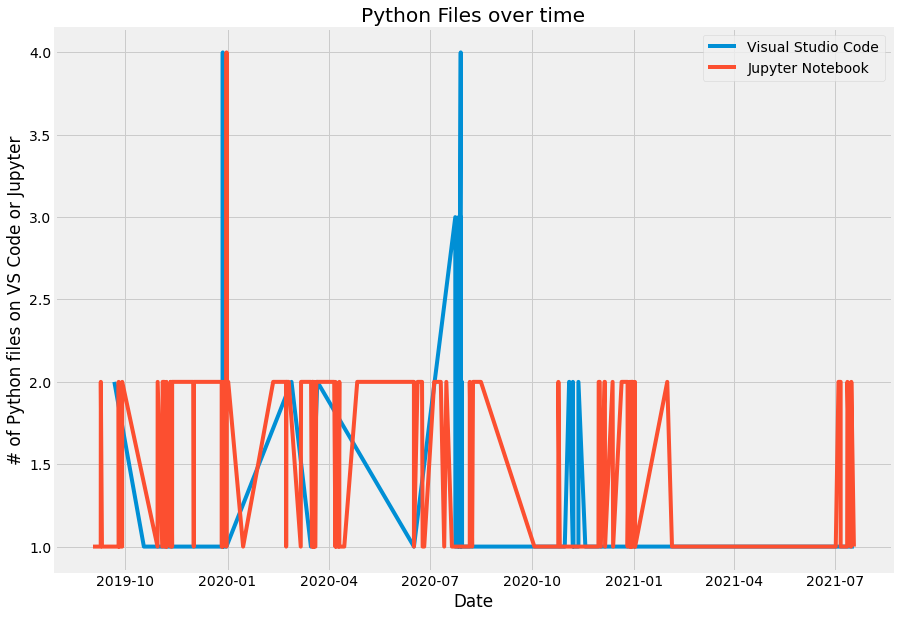

In [71]:
plt.figure(figsize=(15,10))
plt.style.use('fivethirtyeight')
plt.title("Python Files over time")
plt.xlabel("Date")
plt.ylabel('# of Python files on VS Code or Jupyter')
plt.legend(['Visual Studio', 'Jupyter'], loc='upper right')
s = df_python_vs['Date'].value_counts().sort_index()
j = df_python_jupyter_['Date'].value_counts().sort_index()
plt.plot(s, label='Visual Studio Code')
plt.plot(j, label='Jupyter Notebook')
plt.legend()

In [72]:
df_python_jupyter_['File Type'].value_counts(), df_python_vs['File Type'].value_counts()

(Jupyter Notebook    469
 Name: File Type, dtype: int64,
 Python file    264
 Name: File Type, dtype: int64)

In [73]:
df_python_jupyter_['Date'].value_counts()

2019-12-31 02:54:21    4
2019-12-30 23:40:50    2
2020-12-30 01:28:02    2
2020-03-07 22:31:56    2
2020-12-05 16:17:47    2
                      ..
2020-12-28 22:40:24    1
2020-10-24 17:13:34    1
2021-07-15 07:04:49    1
2019-09-08 16:55:10    1
2021-07-17 19:47:48    1
Name: Date, Length: 301, dtype: int64

In [74]:
df_python_vs['Date'].value_counts()

2020-07-28 22:10:22    4
2020-07-28 21:59:55    4
2019-12-27 17:11:21    4
2019-12-27 16:52:45    4
2020-07-24 00:16:13    3
                      ..
2021-07-17 19:10:12    1
2021-07-05 16:10:35    1
2020-11-07 13:45:51    1
2021-07-07 02:09:42    1
2019-12-29 18:47:38    1
Name: Date, Length: 226, dtype: int64

In [75]:
raw_df['File Type'].value_counts()

                          6623
Javascript                5261
Python file               1085
JSON file                  635
Jupyter Notebook           548
JPG Image file             502
SVG Image file             298
PNG Image file             288
Text document              152
PDF file                    40
Python file (compiled)      14
HTML                        10
Thumbnail                    7
CSS Styling                  6
Icon Image file              4
CSV file                     2
Name: File Type, dtype: int64

In [76]:
raw_df['Date'].value_counts()

10/26/1985 :: 08:15:00    5449
08/26/2018 :: 00:52:52    1576
09/21/2019 :: 02:56:04     536
08/10/2018 :: 02:01:48     411
09/21/2019 :: 02:56:02     390
                          ... 
12/31/2019 :: 00:47:06       1
11/22/2020 :: 13:22:40       1
09/14/2020 :: 00:55:02       1
03/21/2020 :: 20:02:42       1
12/05/2020 :: 15:02:42       1
Name: Date, Length: 2207, dtype: int64

## Sorting by dates

### For Python-Jupyter first

In [77]:
df_python_jupyter_dates = df_python_jupyter_[['File', 'File Type', 'Date']]
df_python_jupyter_dates

,File,File Type,Date
8,.Untitled.ipynb,Jupyter Notebook,2020-12-05 20:01:10
9,bokeh_static.ipynb,Jupyter Notebook,2021-07-04 01:53:14
15,bokeh_static-checkpoint.ipynb,Jupyter Notebook,2021-07-04 01:53:14
16,.Untitled-checkpoint.ipynb,Jupyter Notebook,2020-12-05 19:53:08
19,.05 Matplotlib Lecture.ipynb,Jupyter Notebook,2020-12-27 14:23:29
...,...,...,...
7432,.Matrix_capital.ipynb,Jupyter Notebook,2020-08-08 04:22:56
7441,.Coatue-checkpoint.ipynb,Jupyter Notebook,2020-08-08 23:02:20
7442,.Tiger Global-checkpoint.ipynb,Jupyter Notebook,2020-08-16 01:25:32
7443,.Matrix_capital-checkpoint.ipynb,Jupyter Notebook,2020-08-06 00:57:09


In [78]:
df_python_jupyter_dates_sorted = df_python_jupyter_dates.sort_values(by=['Date'])
df_python_jupyter_dates_sorted.shape

(469, 3)

In [79]:
df_python_jupyter_dates_sorted.set_index('Date')

,File,File Type
Date,,
2019-09-01 21:26:26,.Chipolte-checkpoint.ipynb,Jupyter Notebook
2019-09-02 14:41:31,.MPL Part 1 Line Graphs-checkpoint.ipynb,Jupyter Notebook
2019-09-02 16:19:10,.Learning Log Project-checkpoint.ipynb,Jupyter Notebook
2019-09-02 16:37:07,.Tech stock data 2000-2013-checkpoint.ipynb,Jupyter Notebook
2019-09-07 02:03:14,.MPL Part 2 Bar Graphs-checkpoint.ipynb,Jupyter Notebook
...,...,...
2021-07-15 07:05:08,goodreads.ipynb,Jupyter Notebook
2021-07-15 11:44:57,ISS_sky.ipynb,Jupyter Notebook
2021-07-15 11:44:57,ISS_sky-checkpoint.ipynb,Jupyter Notebook


In [195]:
df_python_jupyter_dates_sorted['Date'] = pd.to_datetime(df_python_jupyter_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))
df_python_jupyter_dates_sorted.head(10)

df_jupyter_dates_frame = df_python_jupyter_dates_sorted['Date'].value_counts().to_frame()
#df_jupyter_dates_frame_sorted = df_jupyter_dates_frame.sort_values(by='Date')

df_jupyter = df_jupyter_dataframe_sorted.rename(columns={'index':'Date', 'Date':'Files'})
df_jupyter_output = df_jupyter.sort_values(by='Date')
df_jupyter_output.reset_index()


,index,Date,Files
0,7,2019-09-01,1
1,67,2019-09-02,3
2,84,2019-09-07,5
3,100,2019-09-08,7
4,48,2019-09-09,2
...,...,...,...
112,106,2021-07-05,8
113,6,2021-07-10,1
114,77,2021-07-11,4
115,88,2021-07-15,5


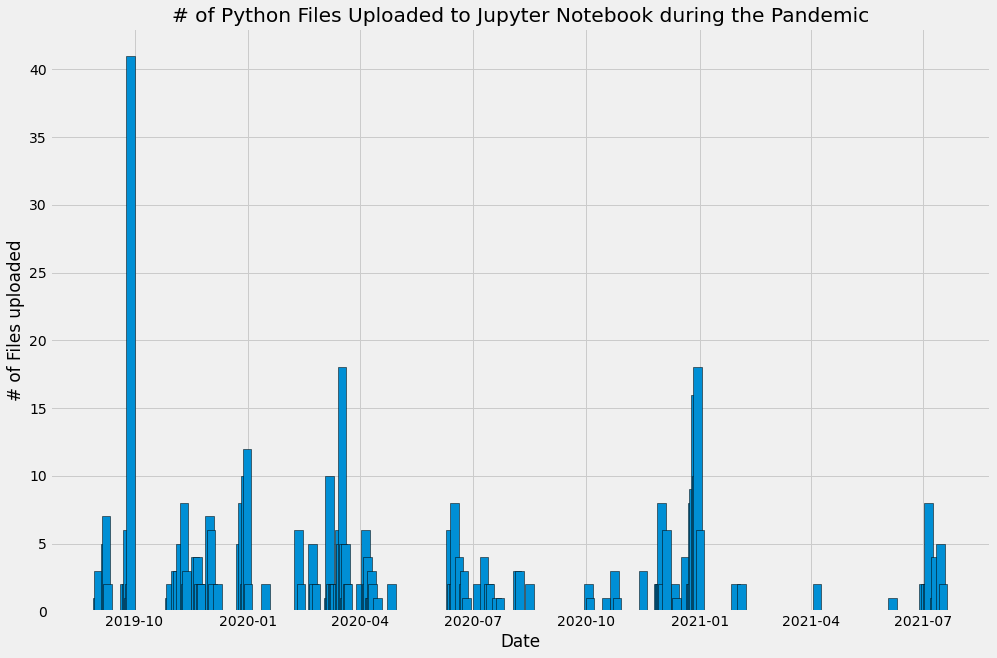

In [178]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.bar(df_jupyter_output['Date'], df_jupyter_output['Files'], width=7, ec='black')
ax.xaxis_date()
plt.xlabel('Date')
plt.ylabel('# of Files uploaded')
plt.title('# of Python Files Uploaded to Jupyter Notebook during the Pandemic')
plt.show()

In [83]:
    # split the date by date and time
# then count frequyency by day

### For Python - VS Code next

In [84]:
df_python_vs_dates = df_python_vs[['File', 'File Type', 'Date']]
df_python_vs_dates

,File,File Type,Date
2,labels.py,Python file,2020-11-19 00:13:59
3,exercise_8.py,Python file,2020-11-22 20:16:56
5,widgets_interactive.py,Python file,2020-11-18 23:28:45
6,filtering_glyphs.py,Python file,2020-11-27 23:57:27
7,widgets.py,Python file,2020-11-18 01:55:44
...,...,...,...
6327,supplies.py,Python file,2019-12-29 02:10:11
6456,OOP_1.py,Python file,2020-03-16 01:04:11
6494,filter.py,Python file,2019-10-17 16:34:16
6576,organize.py,Python file,2019-10-17 21:40:24


In [199]:
df_python_vs_dates_sorted = df_python_vs_dates.sort_values(by=['Date'])
df_python_vs_dates_sorted['Date'] = pd.to_datetime(df_python_vs_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))
df_python_vs_dates_sorted.head(10)

,File,File Type,Date
6715,getSandP.py,Python file,2019-09-21
4966,getSandP.py,Python file,2019-09-21
6494,filter.py,Python file,2019-10-17
6576,organize.py,Python file,2019-10-17
5651,bokeh1.py,Python file,2019-12-26
5638,bokeh2.py,Python file,2019-12-26
5641,bokeh3.py,Python file,2019-12-26
5647,bokeh4.py,Python file,2019-12-26
5650,bokeh5.py,Python file,2019-12-26
5637,bokeh6.py,Python file,2019-12-26


In [206]:
df_python_vs_dates_sorted['Date'] = pd.to_datetime(df_python_vs_dates_sorted['Date'].dt.strftime('%m/%d/%Y'))
df_python_vs_dates_sorted.head(10)

df_vs_dates_frame = df_python_vs_dates_sorted['Date'].value_counts().to_frame()
#df_jupyter_dates_frame_sorted = df_jupyter_dates_frame.sort_values(by='Date')

#df_vs = df_vs_dates_frame.rename(columns={'index':'Date', 'Date':'Files'})
#df_vs_output = df_vs.sort_values(by='Date')
df_vs_raw = df_vs_dates_frame.reset_index()
df_vs_raw

df_vs = df_vs_raw.rename(columns={'index':'Date', 'Date':'Files'})
df_vs_output = df_vs.sort_values(by='Date')
df_vs_output.head()

,Date,Files
29,2019-09-21,2
32,2019-10-17,2
10,2019-12-26,7
0,2019-12-27,50
45,2019-12-28,1


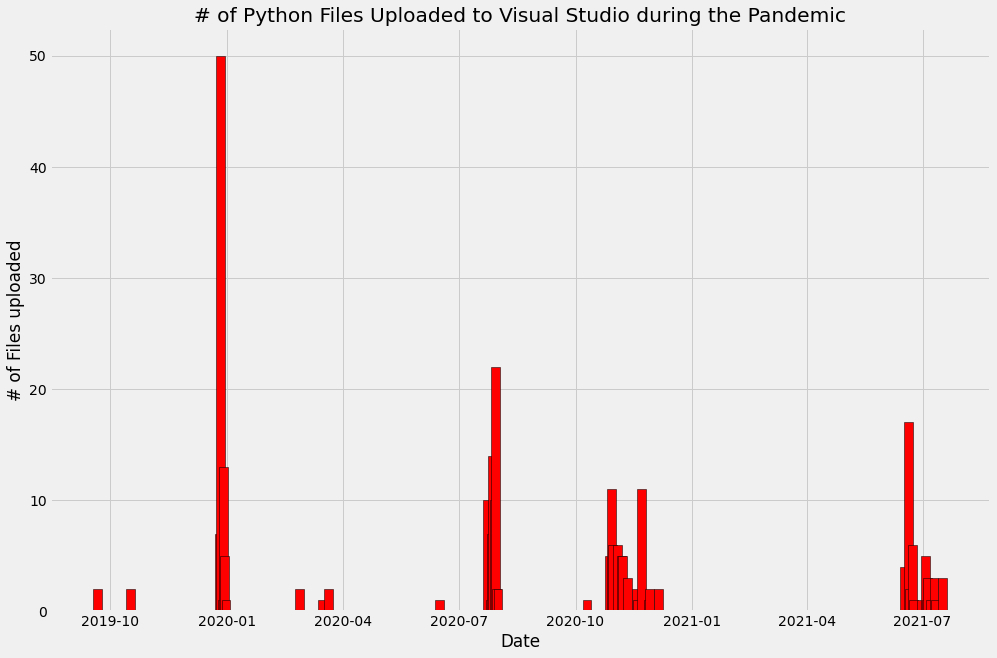

In [209]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111)
ax.bar(df_vs_output['Date'], df_vs_output['Files'], width=7, ec='black', color='red')
ax.xaxis_date()
plt.xlabel('Date')
plt.ylabel('# of Files uploaded')
plt.title('# of Python Files Uploaded to Visual Studio during the Pandemic')
plt.show()

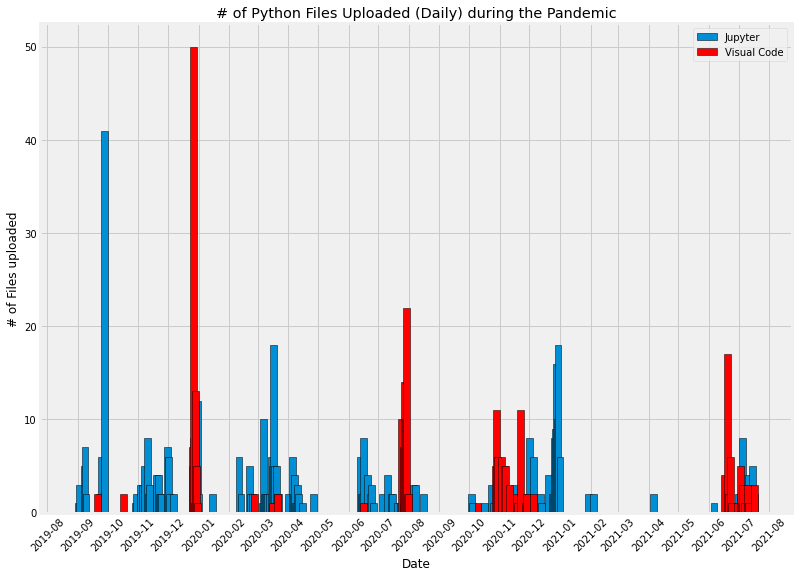

In [224]:
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)
ax.bar(df_jupyter_output['Date'], df_jupyter_output['Files'], width=7, ec='black')
ax.bar(df_vs_output['Date'], df_vs_output['Files'], width=7, ec='black', color='red')
ax.xaxis_date()

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('# of Files uploaded')
plt.title('# of Python Files Uploaded (Daily) during the Pandemic')
plt.legend(['Jupyter', 'Visual Code'])
plt.show()